In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import tempun

In [3]:
# read metadata for individual corpora
noscemus_metadata = pd.read_csv("/srv/data/tome/noscemus/metadata_table_long.csv")
emlap_metadata = pd.read_csv("/srv/data/tome/tome-corpus/emlap_metadata.csv", sep=";")
cc_metadata = pd.read_json("/srv/data/corpus-corporum/cc_metadata.json")
lagt_oga = pd.read_csv("https://raw.githubusercontent.com/sdam-au/LAGT/refs/heads/master/data/gr_metadata_merged.csv")
#lagt = pd.read_parquet("/srv/data/greek/LAGT/LAGT_v4-1.parquet")

## Emlap

In [4]:
emlap_metadata.columns

Index(['working_title', 'No.', 'is_done', 'is_noscemus', 'if_noscemus_id',
       '#if is_noscemus = True, don't transcribe', 'AUTHORSHIP',
       'is_one_author',
       '#if more than 1 author skip section and choose compendium below',
       'is_author_known', 'author_name', 'author_name_alternatives',
       'author_viaf', 'author_cerl', 'author_comments', 'is_compendium',
       'if_compendium', 'TRANSLATION / EDITORSHIP', 'is_translator',
       'translator_name', 'translator_name_alternatives', 'translator_viaf',
       'translator_cerl', 'translator_comments', 'is_editor', 'editor_name',
       'editor_name_alternatives', 'editor_viaf', 'editor_cerl',
       'editor_comments', 'DATE OF PUBLICATION', 'date_publication',
       'date_certainty', 'date_not_after', 'date_not_before', 'date_comment',
       'TITLE', 'title_short', 'title_full', 'title_viaf', 'title_comments',
       'PLACE OF PUBLICATION', 'place_publication', 'place_geonames',
       'place_comments', 'PUBLISHER', 

In [5]:
emlap_metadata["grela_source"] = "emlap"
emlap_metadata["grela_id"] = emlap_metadata["No."].apply(lambda x: "emlap_{}".format(str(x)))

In [6]:
emlap_metadata["not_before"] = emlap_metadata["date_publication"]
emlap_metadata["not_after"] = emlap_metadata["date_publication"]

In [7]:
emlap_metadata_merging = emlap_metadata[["grela_source", "grela_id", "author_name", "title_short", "if_noscemus_id","not_before", "not_after", 'place_publication', 'place_geonames', "author_viaf", "title_viaf"]].copy()

In [8]:
emlap_metadata_merging.rename(columns={
       "author_name" : "author",
       "TITLE" : "title",
       "if_noscemus_id" : "emlap_noscemus_id",
       }, inplace=True)

In [9]:
emlap_metadata_merging.sample(10)

,grela_source,grela_id,author,title_short,emlap_noscemus_id,not_before,not_after,place_publication,place_geonames,author_viaf,title_viaf
16,emlap,emlap_100017,"Bodenstein, Adam",Isagoge,NaN,1559,1559,Basel,=J45,NaN,NaN
28,emlap,emlap_100029,"Paracelsus, Theophrastus von Hohenheim",De vita longa,NaN,1560,1560,Basel,=AC45,NaN,NaN
71,emlap,emlap_100072,"Andernach, Johann Gunther",De medicina veteri et nova,NaN,1571,1571,Basel,NaN,NaN,NaN
50,emlap,emlap_100051,"Ruland, Martin Sr",Medicina practica recens,NaN,1564,1564,unknown,NaN,NaN,NaN
63,emlap,emlap_100064,NaN,De chymico miraculo,NaN,1583,1583,Basel,NaN,NaN,NaN
21,emlap,emlap_100022,NaN,De alchimia opuscula,NaN,1550,1550,Frankfurt,NaN,NaN,NaN
7,emlap,emlap_100008,"Severinus, Petrus",Epistola,NaN,1571,1571,Basel,NaN,NaN,NaN
29,emlap,emlap_100030,"Rupescissa, Johannes",De consideratione quintae essentiae,NaN,1561,1561,Basel,=AD45,NaN,NaN
25,emlap,emlap_100026,Garlandius,Compendium Alchemiae,NaN,1560,1560,Basel,=T45,NaN,NaN
12,emlap,emlap_100013,"Ulstadt, Philipp",Coelum philosophorum,NaN,1525,1525,Freiburg,2660718,216612277.0,NaN


## Corpus Corporum

In [10]:
cc_metadata.columns

Index(['title', 'author', 'year', 'word_count', 'not_before', 'not_after',
       'is_earlymodern'],
      dtype='object')

In [11]:
cc_metadata["grela_id"] = cc_metadata.index.map(lambda x: "cc_{}".format(str(x)))
cc_metadata["grela_source"] = "cc"


In [12]:
cc_metadata.columns

Index(['title', 'author', 'year', 'word_count', 'not_before', 'not_after',
       'is_earlymodern', 'grela_id', 'grela_source'],
      dtype='object')

In [13]:
cc_metadata_merging = cc_metadata[["grela_source", "grela_id", "author", "title", "not_before", "not_after"]].copy()

In [14]:
cc_metadata_merging.sample(10)

,grela_source,grela_id,author,title,not_before,not_after
6975,cc,cc_6975,Ambrosius Mediolanensis,De poenitentia,340.0,397.0
19693,cc,cc_19693,"Braccesi, Alessandro",Appendices,1503.0,1503.0
11798,cc,cc_11798,Auctor incertus,De diversis ordinibus Ecclesiae,NaN,NaN
20049,cc,cc_20049,"Lippi, Lorenzo",Epigrammata,1440.0,1485.0
12705,cc,cc_12705,Curtius Rufus,Historiae Alexandri Magni,50.0,50.0
8116,cc,cc_8116,Autbertus Cameracensis,Charta de monasterio Wallarensi,640.0,640.0
10455,cc,cc_10455,Radulfus III,Diplomata,NaN,NaN
8252,cc,cc_8252,Auctor incertus,Vita Balthildis,NaN,NaN
9396,cc,cc_9396,Regino Prumiensis-915,De ecclesiasticis disciplinis,915.0,915.0
19670,cc,cc_19670,"Zanchi, Basilio",Ad Petrum Strozzam,NaN,NaN


## Noscemus

In [15]:
noscemus_metadata.columns

Index(['Author', 'Full title', 'In', 'Year', 'Place', 'Publisher/Printer',
       'Era', 'Form/Genre', 'Discipline/Content', 'Original',
       'Digital sourcebook', 'Description', 'References', 'Cited in',
       'How to cite this entry', 'Internal notes', 'Of interest to',
       'Transkribus text available', 'Written by', 'Library and Signature',
       'ids', 'id', 'date_min', 'date_max', 'filename', 'file_year'],
      dtype='object')

In [16]:
noscemus_metadata["grela_source"] = "noscemus"
noscemus_metadata["grela_id"] = noscemus_metadata["id"].apply(lambda x: "noscemus_{}".format(str(x)))

In [17]:
noscemus_metadata_merging = noscemus_metadata[["grela_source", "grela_id", 'Author', 'Full title', 'Place', 'Form/Genre', 'Discipline/Content',
       'date_min', 'date_max']].copy()

In [18]:
noscemus_metadata_merging.rename(columns={
       "Author" : "author",
       'Full title' : "title",
       "date_min" : "not_before",
       "date_max": "not_after",
       "Place" : "noscemus_place",
       "Form/Genre" : "noscemus_genre",
       "Discipline/Content" : "noscemus_discipline"}, inplace=True)

In [19]:
noscemus_metadata_merging.sample(10)

,grela_source,grela_id,author,title,noscemus_place,noscemus_genre,noscemus_discipline,not_before,not_after
391,noscemus,noscemus_632441,"Gross, Johann Georg,Brunn, Johann Jakob von","Theoremata philosophica de stella magorum, qua...",Basel,Dissertation,Astronomy/Astrology/Cosmography,1611.0,1611.0
169,noscemus,noscemus_915173,"Brunfels, Otto",Herbarum vivae eicones ad naturae imitationem ...,Strasbourg,"Translation, Other (see description), Historia...","Biology, Medicine",1530.0,1536.0
918,noscemus,noscemus_736350,"Torrella, Gaspar",Tractatus cum consiliis contra pudendagram seu...,Rome,"Monograph, Report, Other (see description)",Medicine,1497.0,1497.0
671,noscemus,noscemus_831510,"Oddi, Oddo degli","Oddi de Oddis, Patavini physici ac medici cele...",Venice,Commentary,Medicine,1575.0,1575.0
231,noscemus,noscemus_702149,"Crato, Johannes","Assertio Iohannis Cratonis a Kraftheim, trium ...",Frankfurt am Main,Letter,Medicine,1585.0,1585.0
851,noscemus,noscemus_735144,"Schoonhoven, Florens",In Alcumistas. Emblema XLVIII.,Gouda,"Commentary, Other (see description)",Alchemy/Chemistry,1618.0,1618.0
601,noscemus,noscemus_598518,"Malpighi, Marcello",Anatome plantarum. Cui subiungitur appendix it...,London,Monograph,Biology,1675.0,1679.0
943,noscemus,noscemus_693145,"Vorstius, Aelius Everardus","Everardi Vorstii, medicinae professoris, orati...",[Leiden],"Biography, Bibliography, Oration","Geography/Cartography, Biology, Medicine",1611.0,1611.0
755,noscemus,noscemus_607721,"Rapin, René",Hortorum libri IV cum disputatione de cultura ...,Paris,Didactic poem,Biology,1665.0,1665.0
45,noscemus,noscemus_605241,"Aselli, Gaspare","De lactibus sive lacteis venis, quarto vasorum...",Milan,Monograph,Medicine,1627.0,1627.0


## LAGT

In [20]:
lagt_oga.columns

Index(['doc_id', 'LAGT3?', 'LAGT4-1?', 'glaux?', 'oga?', 'lagt4-1_author',
       'glaux_AUTHOR_STANDARD', 'oga_author', 'lagt4-1_title',
       'glaux_TITLE_STANDARD', 'oga_title_labels',
       'oga_title_from_print_edition', 'lagt4-1_not_before',
       'lagt4-1_not_after', 'glaux_STARTDATE', 'glaux_ENDDATE',
       'oga_not_before', 'oga_not_after', 'oga_date_source',
       'oga_date_source_link', 'oga_comment_on_chronology',
       'oga_formatted_work_date', 'lagt3_tokencount', 'lagt4-1_tokencount',
       'glaux_TOKENS', 'oga_tokencount', 'lagt4-1_tlg_epithet',
       'lagt4-1_genre', 'glaux_GENRE_STANDARD', 'glaux_DIALECT',
       'lagt4-1_provenience', 'glaux_GLAUX_TEXT_ID', 'glaux_TLG',
       'glaux_SOURCE', 'glaux_SOURCE_FORMAT', 'glaux_TM_TEXT', 'oga_id',
       'oga_print_edition'],
      dtype='object')

In [21]:
lagt_oga["not_before"] = lagt_oga["oga_not_before"].combine_first(lagt_oga["lagt4-1_not_before"])
lagt_oga["not_after"] = lagt_oga["oga_not_after"].combine_first(lagt_oga["lagt4-1_not_after"])

In [22]:
lagt_oga[['lagt4-1_author', 'oga_author', 'glaux_AUTHOR_STANDARD', "lagt4-1_title", 'glaux_TITLE_STANDARD', 'oga_title_labels']].sample(10)

,lagt4-1_author,oga_author,glaux_AUTHOR_STANDARD,lagt4-1_title,glaux_TITLE_STANDARD,oga_title_labels
94,NaN,Pseudo-Aristotle,NaN,NaN,NaN,De mundo
602,Galen,Galen,Galenus,De animi cuiuslibet peccatorum dignotione et c...,De animi cuiuslibet peccatorum dignotione et c...,De animi cuiuslibet peccatorum dignotione et c...
2121,Catenae (Novum Testamentum),Catenae (Novum Testamentum),NaN,Catena In Epistulam Ad Philemonem,NaN,Catena In Epistulam Ad Philemonem (E Cod. Pari...
894,Aelius Herodianus,Aelius Herodianus,NaN,Περι Καθολικης Προσῳδιας,NaN,De prosodia catholica
2132,Catenae (Novum Testamentum),Catenae (Novum Testamentum),NaN,Commentarius In Apocalypsin,NaN,Commentarius In Apocalypsin (Pseudo-Oecumenii)...
2065,Elias Neoplatonicus,Elias Neoplatonicus,NaN,In Porphyrii isagogen,NaN,In Porphyrii Isagogen
266,Plutarch,Plutarch,Plutarchus,Περὶ τοῦ τὰ ἄλογα λόγῳ χρῆσθαι,Bruta animalia ratione uti,Bruta animalia ratione uti
1486,pseudo-Hippocrates,Pseudo-Hippocrates,NaN,De septimestri partu,NaN,De septimestri partu
1545,Anonymous,Hermetica,Corpus Hermeticum,Ἑρμοῦ τοῦ τρισμεγίστου περὶ νοῦ ⎡κοινοῦ⎤ πρὸς Τάτ,Περὶ νοῦ κοινοῦ πρὸς Τάτ,Περὶ νοῦ κοινοῦ πρὸς Τάτ
1765,pseudo-Menander,Gregorius Nazianzenus,NaN,Sententiae = (Carmen morale XXX),NaN,Carmina moralia


In [23]:
lagt_oga["author"] = (
    lagt_oga["lagt4-1_author"]
    .combine_first(lagt_oga["oga_author"])
    .combine_first(lagt_oga["glaux_AUTHOR_STANDARD"])
)

lagt_oga["title"] = (
    lagt_oga["lagt4-1_title"]
    .combine_first(lagt_oga["oga_title_labels"])
    .combine_first(lagt_oga["glaux_TITLE_STANDARD"])
)

In [24]:
lagt_oga["grela_id"] = lagt_oga["doc_id"].apply(lambda x: "lagt_{}".format(str(x)))
lagt_oga["grela_source"] = "lagt"

In [25]:
lagt_merging = lagt_oga[["grela_source", "grela_id", "author", "title", "not_before", "not_after", "lagt4-1_tlg_epithet", "lagt4-1_genre", "lagt4-1_provenience"]].copy()

In [26]:
lagt_merging.rename(columns={
       "lagt4-1_tlg_epithet": "lagt_tlg_epithet",
       "lagt4-1_provenience" : "lagt_provenience",
       "lagt4-1_genre": "lagt_genre"}, inplace=True)

In [27]:
lagt_merging.sample(10)

,grela_source,grela_id,author,title,not_before,not_after,lagt_tlg_epithet,lagt_genre,lagt_provenience
232,lagt,lagt_tlg0007.tlg095,Plutarch,Περὶ ἀοπγησίας,91.0,100.0,['Biographi' 'Philosophici/-ae'],[],pagan
490,lagt,lagt_tlg0026.tlg004,Aeschines [Sp.],Ἐπιστολαί,-398.0,-321.0,['Oratores'],[],pagan
834,lagt,lagt_tlg0083.tlg003,Dionysius of Byzantium,De Bospori Navigatione,101.0,200.0,['Geographi'],[],pagan
2121,lagt,lagt_tlg4102.tlg037,Catenae (Novum Testamentum),Catena In Epistulam Ad Philemonem,501.0,600.0,[],[],christian
808,lagt,lagt_tlg0074.tlg004,Arrian,Περίπλους τοῦ Εὐξείνου Πόντου,131.0,132.0,['Historici/-ae' 'Philosophici/-ae'],[],pagan
17,lagt,lagt_pta0001.pta016,Severian of Gabala,In filium prodigum,400.0,409.0,NaN,NaN,NaN
1461,lagt,lagt_tlg0693.tlg001,Albinus,Διδασκαλικὸς τῶν Πλάτωνος δογμάτων,101.0,200.0,['Philosophici/-ae'],[],pagan
2073,lagt,lagt_tlg4026.tlg003,Anonymi in Aristotelis Artem Rhetoricam,Fragmentum paraphrasis in Aristotelis rhetorica,601.0,1200.0,NaN,NaN,NaN
1,lagt,lagt_ogl0001.ogl001,Pinytus,De Epistola Pinyti ad Dionysium,101.0,200.0,[],[],christian
1013,lagt,lagt_tlg0284.tlg007,Aelius Aristides,Ἀσκληπιάδαι,117.0,187.0,['Rhetorici'],[],pagan


# GreLa merge

In [28]:
grela_works_metadata = pd.concat([lagt_merging, cc_metadata_merging, noscemus_metadata_merging, emlap_metadata_merging], ignore_index=True)

In [29]:
len(grela_works_metadata)

11044

In [30]:
grela_works_metadata.groupby("grela_source").size()

grela_source
cc          7819
emlap         75
lagt        2175
noscemus     975
dtype: int64

In [31]:
grela_works_metadata.columns

Index(['grela_source', 'grela_id', 'author', 'title', 'not_before',
       'not_after', 'lagt_tlg_epithet', 'lagt_genre', 'lagt_provenience',
       'noscemus_place', 'noscemus_genre', 'noscemus_discipline',
       'title_short', 'emlap_noscemus_id', 'place_publication',
       'place_geonames', 'author_viaf', 'title_viaf'],
      dtype='object')

In [32]:
grela_works_metadata[["grela_id","not_before"]].sample(10)

,grela_id,not_before
6636,cc_21396,NaN
7355,cc_7388,NaN
11016,emlap_100048,1579.0
1538,lagt_tlg1286.tlg005,101.0
925,lagt_tlg0087.tlg032,101.0
9843,cc_9850,NaN
4095,cc_11987,1225.0
4564,cc_13094,1474.0
3504,cc_11314,1115.0
1595,lagt_tlg1444.tlg001,-800.0


In [33]:
grela_works_metadata["date_random"] = grela_works_metadata.apply(
    lambda row: tempun.model_date(row["not_before"], row["not_after"], size=10)[0]
    if tempun.model_date(row["not_before"], row["not_after"], size=10) is not None
    else None,
    axis=1
)


In [34]:
grela_works_metadata.sample(10)

,grela_source,grela_id,author,title,not_before,not_after,lagt_tlg_epithet,lagt_genre,lagt_provenience,noscemus_place,noscemus_genre,noscemus_discipline,title_short,emlap_noscemus_id,place_publication,place_geonames,author_viaf,title_viaf,date_random
1250,lagt,lagt_tlg0551.tlg013,Appian,Συριακή,101.0,200.0,['Historici/-ae'],[],pagan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.0
531,lagt,lagt_tlg0031.tlg022,New Testament,New Testament - 2 Peter,60.0,150.0,[],[],christian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.0
9475,cc,cc_9486,Ratherius Veronensis,Conclusio acta deliberativa Leodici,887.0,974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,938.0
1708,lagt,lagt_tlg1805.tlg009,Vitae Homeri,Eustathii vita,301.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,385.0
9543,cc,cc_9553,Hrothsuita Gandersheimensis,Passio S. Gangolfi,935.0,973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,967.0
4151,cc,cc_12042,Thomas Aquinas,Super Epistolam B.\n\tPauli ad Philipenses lec...,1225.0,1274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1244.0
9799,cc,cc_9806,Notgerus Leodiensis,Vita S. Hadalini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10653,noscemus,noscemus_632443,"Negri, Francesco",Rhetia sive de situ et moribus Rhetorum,1547.0,1547.0,NaN,NaN,NaN,Basel,Didactic poem,Geography/Cartography,NaN,NaN,NaN,NaN,NaN,NaN,1547.0
9071,cc,cc_9086,Haymo Halberstatensis,Homiliae,853.0,853.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,853.0
2651,cc,cc_10471,Auctor incertus,Vita antiquior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

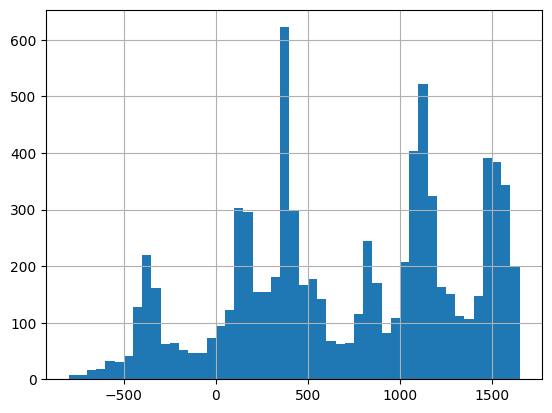

In [35]:
grela_works_metadata["date_random"].hist(bins=range(-800, 1700, 50))


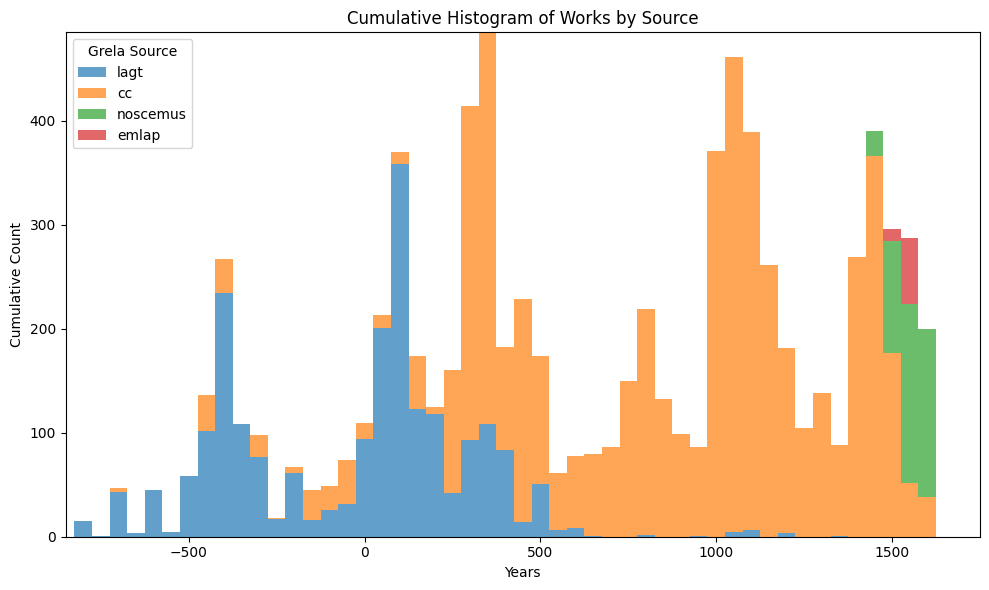

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Set the bins for the histogram
bins = range(-800, 1700, 50)

# Pivot the data to get cumulative counts for each "grela_source"
cumulative_data = {}
for source in grela_works_metadata["grela_source"].unique():
    source_data = grela_works_metadata[grela_works_metadata["grela_source"] == source]["not_before"]
    cumulative_data[source], _ = np.histogram(source_data, bins=bins)

# Get the unique sources to maintain order
sources = grela_works_metadata["grela_source"].unique()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each source's histogram, stacking them
bottom = np.zeros(len(bins) - 1)
for source in sources:
    ax.bar(
        bins[:-1],
        cumulative_data[source],
        width=50,
        bottom=bottom,
        label=source,
        alpha=0.7
    )
    bottom += cumulative_data[source]

# Add labels and legend
ax.set_xlabel("Years")
ax.set_ylabel("Cumulative Count")
ax.set_xlim(-850, 1750)
ax.set_title("Cumulative Histogram of Works by Source")
ax.legend(title="Grela Source")
plt.tight_layout()
plt.show()

In [37]:
fig.savefig("../figures/grela_tempdist-works-by-source.png")

In [38]:
grela_works_metadata.sample(5)

,grela_source,grela_id,author,title,not_before,not_after,lagt_tlg_epithet,lagt_genre,lagt_provenience,noscemus_place,noscemus_genre,noscemus_discipline,title_short,emlap_noscemus_id,place_publication,place_geonames,author_viaf,title_viaf,date_random
3943,cc,cc_11749,Wilhelmus S. Thomae de Paraclito,Genealogia regum Danorum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6293,cc,cc_20124,"Rapicio, Andrea",Epitaphium,1533.0,1573.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1538.0
1497,lagt,lagt_tlg1157.tlg001,Apocalypsis Esdrae,Apocalypsis Esdrae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7145,cc,cc_7180,Hieronymus Stridonensis,Commentaria in Sophoniam,340.0,420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372.0
3986,cc,cc_11792,Odo de Soliaco1150-1208,Statuta et donationes,1150.0,1208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1206.0


In [39]:
grela_works_metadata.to_parquet("../data/grela_works_metadata.parquet", index=False)